## Global Electricity Statistics (1980-2021)_세계 전기 통계 데이터  
⚡Energy Trends and Insights from Around the Globe⚡

### 주요 사용 사례 
- 시계열 분석: 전기 생산, 소비, 수입, 수출 등의 다양한 패턴을 찾기 위한 시계열 분석
- 시계열 예측: 미래의 전기 생산 및 소비를 예측하기 위한 시계열 예측
- 용량: 발전소의 현재 용량 통계를 찾고 미래 값을 예측합니다.
- 전기 손실 감소: 배전 손실 패턴을 분석하고 감소 방법을 찾습니다.


- 중요 사항:
    - 데이터셋에는 결측값이 포함되어 있으며, 모든 값이 객체 데이터 형식일 수 있으므로 먼저 정수 또는 부동 소수점으로 변환해야 할 수 있습니다 :)

In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

#### 데이터 정보
- Country(국가): 국가의 이름
- Region(지역): 국가의 지역
- Electricity Transaction(전기 거래): 7가지 유형의 거래/활동, 이에 대한 자세한 내용은 아래에 설명되어 있습니다.
- Years(연도): 1980년부터 2021년까지의 총 41개의 연도

- 전기 활동/거래:
    - Net Generation (billion kWh)(순발전량): 전기 생산량/생성량
    - Net Consumption (billion kWh)(순소비량): 전기 소비량
    - Imports (billion kWh)(수입량): 전기 수입량
    - Exports (billion kWh)(수출량): 전기 수출량
    - Net Imports (billion kWh)(순수입량): 전기 순 수입량
    - Installed Capacity (million kW)(설치 용량): 발전소(또는 발전소로 알려진)가 제조업체가 지정한 특정 조건 하에서 생산할 수 있는 최대 전기 양
    - Distribution Losses (billion kWh)(배전 손실량): 송전 및 배전 손실은 공급원과 분배 지점 간의 전기 전송 중에 발생하는 손실을 나타냅니다.

In [23]:
df = pd.read_csv('../datasets/Global Electricity Statistics.csv')
df[:5]

,Country,Features,Region,1980,1981,1982,1983,1984,1985,1986,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Algeria,net generation,Africa,6.683,7.65,8.824,9.615,10.537,11.569,12.214,...,53.9845,56.3134,60.39972,64.68244,66.75504,71.49546,72.10903,76.685,72.73591277,77.53072719
1,Angola,net generation,Africa,0.905,0.906,0.995,1.028,1.028,1.028,1.088,...,6.03408,7.97606,9.21666,9.30914,10.203511,10.67604,12.83194,15.4,16.6,16.429392
2,Benin,net generation,Africa,0.005,0.005,0.005,0.005,0.005,0.005,0.005,...,0.04612,0.08848,0.22666,0.31056,0.26004,0.3115,0.19028,0.2017,0.22608,0.24109728
3,Botswana,net generation,Africa,0.443,0.502,0.489,0.434,0.445,0.456,0.538,...,0.33,0.86868,2.17628,2.79104,2.52984,2.8438,2.97076,3.0469,2.05144,2.18234816
4,Burkina Faso,net generation,Africa,0.098,0.108,0.115,0.117,0.113,0.115,0.122,...,0.86834,0.98268,1.11808,1.43986,1.5509,1.64602,1.6464,1.72552,1.647133174,1.761209666


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 45 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Country   1610 non-null   object
 1   Features  1610 non-null   object
 2   Region    1610 non-null   object
 3   1980      1582 non-null   object
 4   1981      1582 non-null   object
 5   1982      1582 non-null   object
 6   1983      1582 non-null   object
 7   1984      1582 non-null   object
 8   1985      1582 non-null   object
 9   1986      1582 non-null   object
 10  1987      1582 non-null   object
 11  1988      1582 non-null   object
 12  1989      1582 non-null   object
 13  1990      1582 non-null   object
 14  1991      1582 non-null   object
 15  1992      1582 non-null   object
 16  1993      1582 non-null   object
 17  1994      1582 non-null   object
 18  1995      1582 non-null   object
 19  1996      1582 non-null   object
 20  1997      1582 non-null   object
 21  1998      1582

In [25]:
df.columns

Index(['Country', 'Features', 'Region', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021'],
      dtype='object')

#### 결측치 처리 

In [26]:
df.isnull().sum()

Country      0
Features     0
Region       0
1980        28
1981        28
1982        28
1983        28
1984        28
1985        28
1986        28
1987        28
1988        28
1989        28
1990        28
1991        28
1992        28
1993        28
1994        28
1995        28
1996        28
1997        28
1998        28
1999        28
2000        28
2001        28
2002        28
2003        28
2004        28
2005        28
2006        28
2007        28
2008        28
2009        28
2010        28
2011        28
2012        28
2013        28
2014        28
2015        28
2016        28
2017        28
2018        28
2019        28
2020        31
2021        26
dtype: int64

In [27]:
df = df_GES.dropna()

#### value 소수점 2째자리까지만 표현 

In [36]:
# 'Country', 'Features', 'Region' 칼럼 추출
df_meta = df[['Country', 'Features', 'Region']]

# 년도 칼럼 선택
df_year = df.drop(columns=['Country', 'Features', 'Region'])  # 3번째 칼럼부터 끝까지 년도 칼럼
df_year

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,6.683,7.65,8.824,9.615,10.537,11.569,12.214,13.014,14.08,14.449,...,53.9845,56.3134,60.39972,64.68244,66.75504,71.49546,72.10903,76.685,72.73591277,77.53072719
1,0.905,0.906,0.995,1.028,1.028,1.028,1.088,1.097,1.097,1.104,...,6.03408,7.97606,9.21666,9.30914,10.203511,10.67604,12.83194,15.4,16.6,16.429392
2,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,...,0.04612,0.08848,0.22666,0.31056,0.26004,0.3115,0.19028,0.2017,0.22608,0.24109728
3,0.443,0.502,0.489,0.434,0.445,0.456,0.538,0.846,0.8,0.797,...,0.33,0.86868,2.17628,2.79104,2.52984,2.8438,2.97076,3.0469,2.05144,2.18234816
4,0.098,0.108,0.115,0.117,0.113,0.115,0.122,0.133,0.143,0.153,...,0.86834,0.98268,1.11808,1.43986,1.5509,1.64602,1.6464,1.72552,1.647133174,1.761209666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,0.244,0.21,0.152,0.326,0.36,0.407,0.337,0.373,0.328,0.372,...,0.239,0.234,0.245,0.248,0.253,0.274864,0.425807,0.424101,0.422757,0.422757
1606,0.00035,0.00035,0.00035,0.00035,0.00035,0.00035,0.00035,0.00035,0.00035,0.0007,...,0,0,0,0,0,0.014,0.0125,0.0125,0.0125,0.01277172
1607,0.05243,0.05537,0.05607,0.05761,0.05789,0.05922,0.06055,0.06335,0.06384,0.06251,...,0.063,0.06,0.06,0.06,0.065,0.065,0.05,0.051,0.051,0.051
1608,0.55,0.426,0.627,0.662,0.78,0.702,0.911,1.063,1.034,0.843,...,1.292,1.282,1.253,1.49,1.608,1.694491,1.557257,1.322331,1.129273,1.129273


In [45]:
df_year = df_year.astype(int)

ValueError: invalid literal for int() with base 10: '6.683'

In [ ]:
# 숫자를 문자열로 변환
number = 77.53072719
number_str = "{:.2f}".format(number)

# 소수점 이하 두 자리까지의 문자열을 다시 부동 소수점으로 변환
rounded_number = float(number_str)

In [ ]:
df['숫자열'] = df['숫자열'].astype(int)

#### 2021년의 net generation인 국가 추출

In [10]:
generation = df_GES[(df_GES['Features'] == 'net generation')]
generation[:2]

,Country,Features,Region,1980,1981,1982,1983,1984,1985,1986,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Algeria,net generation,Africa,6.683,7.65,8.824,9.615,10.537,11.569,12.214,...,53.9845,56.3134,60.39972,64.68244,66.75504,71.49546,72.10903,76.685,72.73591277,77.53072719
1,Angola,net generation,Africa,0.905,0.906,0.995,1.028,1.028,1.028,1.088,...,6.03408,7.97606,9.21666,9.30914,10.203511,10.67604,12.83194,15.4,16.6,16.429392


In [12]:
plot = generation.filter(['Country', '2021'], axis=1)
plot2 = plot.rename(columns={'2021':'Net_Generation'})
plot2[:5]

,Country,Net_Generation
0,Algeria,77.53072719
1,Angola,16.429392
2,Benin,0.24109728
3,Botswana,2.18234816
4,Burkina Faso,1.761209666


### top 10

In [19]:
pd.pivot_table(data=df_GES, index='Country', values='2021', aggfunc='sum')

,2021
Country,
Afghanistan,0.829093925.5305972125.36835693905.3683569390....
Albania,8.9629437.4158708742.2522.8-0.5482.5404250.999...
Algeria,77.5307271968.663379190.5019346920.598533333-0...
American Samoa,0.1696673660.1555980530000.0470660.014069313
Angola,16.42939214.560490710007.3441.868901294
...,...
Wake Island,0000000
Western Sahara,000000.0580
Yemen,3.5208742062.9313202060001.7720.589554


In [ ]:
# 상위 7개 순위
df_titanic_sur_sum = pd.pivot_table(data=df_titanic_sur, index='Ticket', values='Survived', aggfunc='sum' ) #총합으로 요약
df_titanic_top_list = df_titanic_sur_sum.sort_values(by='Survived', ascending=False).iloc[:7].index.to_list()
df_titanic_top_list

In [ ]:
# 변수 안에서 원하는 항목 필터링 : 상위 3개 분석
conditions = (df_TOCC_choose['product'] == 'K4') | (df_TOCC_choose['product'] == 'K5') | (df_TOCC_choose['product'] == 'K6')
df_TOCC_choose_product = df_TOCC_choose.loc[conditions]
df_TOCC_choose_product[:2]

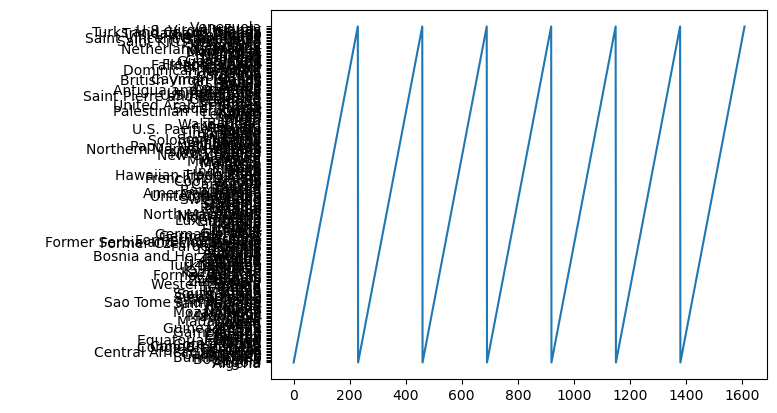

In [13]:
plt.plot(range(len(df_GES)), df_GES['Country'])
plt.show()